## Setup 

In [1]:
# Imports
import os
import sys
import pandas as pd
import seaborn as sb

# Custom Imports
sys.path.insert(0, '../../')
import stats_toolbox as st
from stats_toolbox.utils.data_loaders import load_fem_preg_2002

# Graphics setup 
%pylab inline --no-import-all
sb.set_context('notebook', font_scale=1.5)

Populating the interactive namespace from numpy and matplotlib


## Load Data

In [2]:
# Load and Clean Data
df = load_fem_preg_2002('../data')
full_term = df[df['prglngth'] >= 37]
weights = df.birthwgt_kg.dropna()

## Histograms

In [22]:
H = st.Hist(df.birthwgt_kg, label='Birth Weight')

When plotting, the following keyword arguments can be passed to configure the plot once it has been generated:

* `title`, `xlabel`, `ylabel`, `xscale`, `yscale`, `xticks`, `yticks`, `axis`, `xlim`, `ylim`, `legend`

These all call the appropriate method from pyplot to alter the plot with the values passed in. e.g.

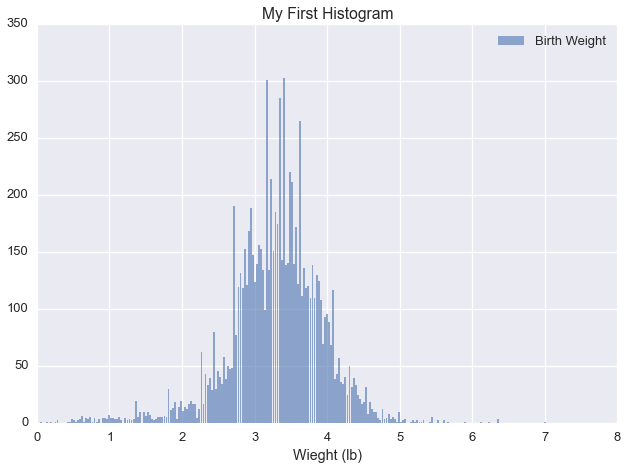

In [23]:
H.plot(title='My First Histogram', xlabel='Wieght (lb)', legend=True)

By default the plotting method used is pyplot.bar to plot each data points frequency. 

Note that the apparent pattern in the bars above is due to the plot rendering itself (lots of bars very close together), not the underlying data. Zooming in to the plot shows this to be the case. 

To be able to parse in the number of bins, we need to use plt.hist instead of plt.bar. to do this pass in `mpl_hist=True`. Additional keywords are then parsed to pyplot.hist instead of pyplot.bar

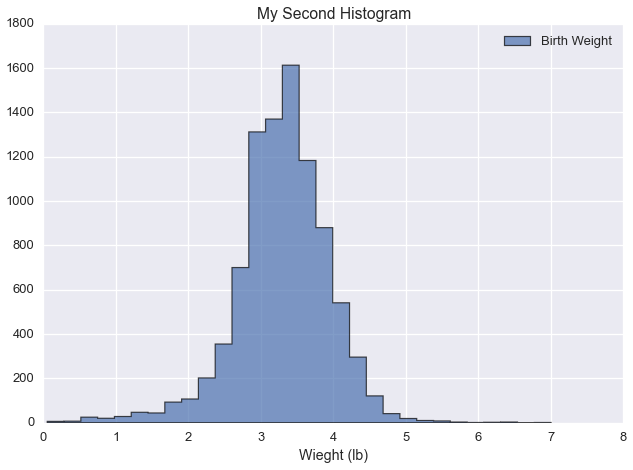

In [24]:
H.plot(mpl_hist=1, bins=30, histtype='stepfilled', alpha=0.7, 
      title='My Second Histogram', xlabel='Wieght (lb)', legend=True)

multiple plots are possible with the sb.multiplot command that plots multiple objects on a single axes

In [2]:
hist1 = st.Hist(np.repeat(np.arange(0,20,2), np.arange(20,0,-2)), label='Hist 1')
hist2 = st.Hist(np.repeat(np.arange(10,30,2), np.arange(20,0,-2)), label='Hist 2')

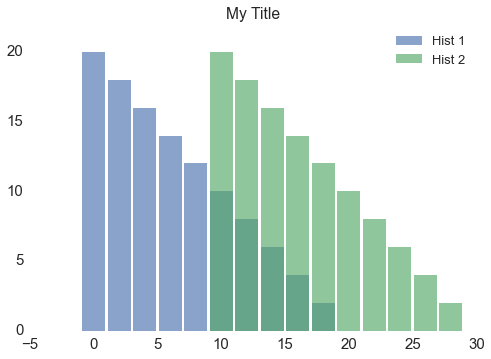

In [3]:
f = st.mulitplot([hist1, hist2], title='My Title', ylim=(0,22))

specific plotting parameters canbe passed via the `plt_kwds` argument

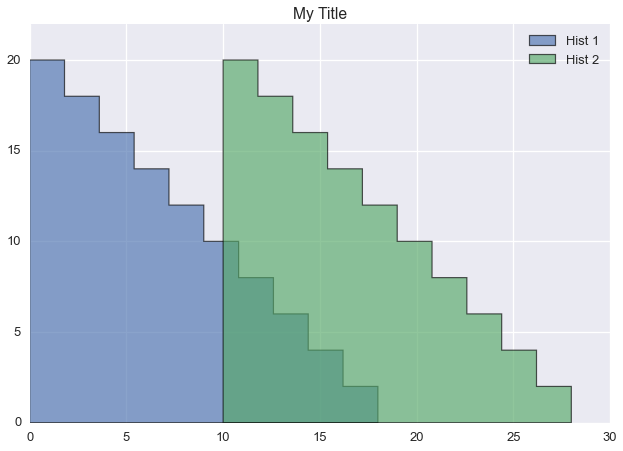

In [5]:
f = st.mulitplot([hist1, hist2], plt_kwds={'mpl_hist': True, 'bins': 10}, 
                 title='My Title', ylim=(0,22))

## Useful Methods 

In [25]:
# Find the n largest/smallest values and thier frequencies 
top20 = H.largest(20)
bottom5 = H.smallest(5)

In [26]:
# Histogram Arithmatic/Manipulation
hist1 = st.Hist(np.repeat(np.arange(0,20,2), np.arange(20,0,-2)))
hist2 = st.Hist(np.repeat(np.arange(10,30,2), np.arange(20,0,-2)))

In [8]:
hist3 = hist1 + hist2

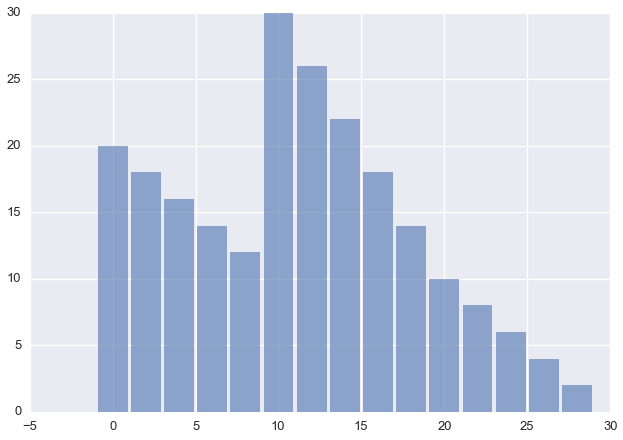

In [10]:
hist3.plot()

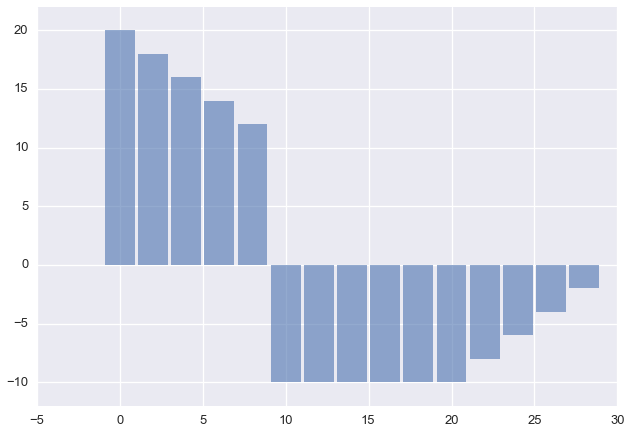

In [12]:
(hist1 - hist2).plot(ylim=(-12, 22))

## Probability Mass Function

In [30]:
# Convert to PMF
pmf = H.to_pmf()

In [34]:
# stats on th Pmf
pmf.mean()
pmf.var()
pmf.std()
pmf.maximum_likelihood()

3.4019399999999997

In [ ]:
# Calculate Probabilities
pmf.prob_less()
pmf.prob()  # get probability of an item

In [33]:
pmf.prob_less(3)

0.27970789997787121

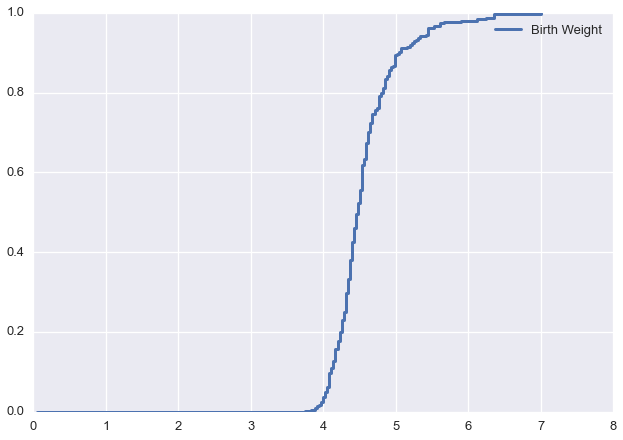

In [24]:
# Compute simulated 
cdf = pmf.max(30)
cdf.plot()

In [28]:
pmf.maximum_likelihood()

3.4019399999999997